# Fruit recognition

## Chargement des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as im
import sklearn as sk
import glob
import os
import datetime as dt
import seaborn as sea

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

## Chargement des données (train)

In [ ]:
tabImg=pd.DataFrame()
categories = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
label = []
root_dir=os.getcwd()+"\\data\\train\\"

for filename in glob.iglob(root_dir+'**\\*.jpg',recursive=True):
    img=im.imread(filename)
    img=img.reshape(img.shape[0]*img.shape[1]*img.shape[2])
    
    fruit_name=filename.split('\\')[-2]
    
    label.append(categories.index(fruit_name))
    tabImg=tabImg.append(pd.Series(img),ignore_index=True)
tabImg['label']=label

In [ ]:
tabImg.shape

In [ ]:
tabImg.to_csv('train.csv',index=False)

In [ ]:
np.save('train.npy', tabImg)

In [ ]:
tabImg.head(5)

## Récupération des données (train)

In [2]:
#tab=pd.read_csv('train.csv')
tab = np.load('train.npy', allow_pickle=True)

In [3]:
print(tab.shape)
tab=pd.DataFrame(tab)

(16854, 30001)


In [4]:
tab.head(5)

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,30000
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
1,255.0,255.0,246.0,253.0,255.0,247.0,253.0,255.0,249.0,251.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
3,255.0,255.0,251.0,255.0,255.0,253.0,255.0,254.0,252.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0


In [6]:
tab.isna().sum()

0        0
1        0
2        0
3        0
4        0
        ..
29996    0
29997    0
29998    0
29999    0
30000    0
Length: 30001, dtype: int64

# Traitement des données et modèles

In [7]:
X=tab.iloc[:,:-1]
print(X.shape)
X.head(5)

(16854, 30000)


,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
1422,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
14475,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
14561,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2903,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
11990,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [8]:
Y=tab.iloc[:,-1]
print(Y.shape)
Y.head(5)

(16854,)


1422      2.0
14475    28.0
14561    28.0
2903      6.0
11990    23.0
Name: 30000, dtype: float64

# KNN

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,test_size=0.25, random_state=0)

In [10]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(12640, 30000)
(4214, 30000)
(12640,)
(4214,)


In [16]:
resKNN=[]
for i in range(1,31,2):
    KKN = KNeighborsClassifier(n_neighbors=i)
    clf=KKN.fit(Xtrain,ytrain)
    ypredit=clf.predict(Xtest)
    resKNN=np.insert(resKNN,0,accuracy_score(ytest,ypredit))

In [11]:
plt.plot(range(1,31,2),np.flip(resKNN))

NameError: name 'resKNN' is not defined

In [21]:
date=dt.datetime.now().strftime("%Y_%m_%d-%H:%M:%S")
filename='saves/KNN.npy'

np.save(filename, np.flip(resKNN))

In [12]:
resKNN = np.load('saves/KNN.npy', allow_pickle=True)

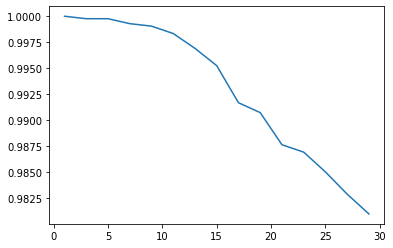

In [14]:
plt.plot(range(1,31,2),resKNN)

In [28]:
print(resKNN)

[0.98101566 0.9829141  0.98504983 0.98694827 0.98766018 0.99074514
 0.99169435 0.99525392 0.99691505 0.99833887 0.99905078 0.99928809
 0.9997627  0.9997627  1.        ]


In [13]:
mat_confusion=metrics.confusion_matrix(ytest,ypredit)
print(mat_confusion.shape)
print(mat_confusion)

[[119   0   0 ...   0   0   0]
 [  0 121   0 ...   0   0   0]
 [  0   0 115 ...   0   0   0]
 ...
 [  0   0   0 ... 122   0   0]
 [  0   0   0 ...   0 190   0]
 [  0   0   0 ...   0   0 110]]


Apple Braeburn


<AxesSubplot:>

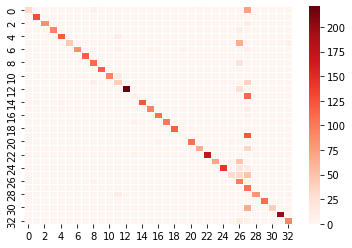

In [95]:
categories = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
print(categories[0])
sea.heatmap(mat_confusion,linewidths=True,cmap='Reds')

In [27]:
KKN = KNeighborsClassifier(n_neighbors=20)
clf=KKN.fit(Xtrain,ytrain)
ypredit=clf.predict(Xtest)
accuracy_score(ytest,ypredit)

0.992406264831514

In [50]:
errPred=ypredit[ypredit != ytest]
errTest=ytest[ypredit != ytest]
print(errPred)
print(errTest)
mat_confusion=metrics.confusion_matrix(ytest,ypredit)

12794    25.0
5494     11.0
14327    28.0
3067      6.0
11099    22.0
11717    23.0
11514    22.0
2086      4.0
12680    24.0
3126      6.0
2272      4.0
5459     11.0
11552    22.0
16598    32.0
2439      5.0
2357      4.0
14209    28.0
2048      4.0
3260      6.0
3180      6.0
3304      6.0
3151      6.0
14353    28.0
2632      5.0
5352     11.0
1395      2.0
1358      2.0
11303    22.0
2006      4.0
13794    27.0
11251    22.0
2852      5.0
Name: 30000, dtype: float64


13343    26.0
6591     12.0
4769      9.0
14891    29.0
15693    31.0
         ... 
15175    30.0
1795      3.0
4364      9.0
8512     16.0
560       1.0
Name: 30000, Length: 4214, dtype: float64

<AxesSubplot:>

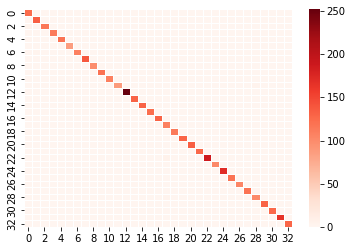

In [33]:
sea.heatmap(mat_confusion,linewidths=True,cmap='Reds')

# SVM


In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,test_size=0.25, random_state=0)

In [16]:
clf=svm.SVC(gamma=0.01)
clf.fit(Xtrain,ytrain)

ypredit=clf.predict(Xtest)

In [17]:
accuracy_score(ytest,ypredit)

0.060512577123872806

accuracy : 0.060512577123872806

In [18]:
mat_confusion=metrics.confusion_matrix(ytest,ypredit)
print(mat_confusion.shape)
print(mat_confusion)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Matrice : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

In [ ]:
sea.heatmap(mat_confusion,linewidths=True,cmap='Reds')

# Decision Tree

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,test_size=0.25, random_state=0)

In [14]:
resTree=[]
for i in range(5,30,3):
    Arbre_decision = DecisionTreeClassifier(random_state=0, max_depth=i)
    clf = Arbre_decision.fit(Xtrain, ytrain)
    ypredit=clf.predict(Xtest)
    resTree=np.insert(resTree,0,accuracy_score(ytest,ypredit))

[0.95989559 0.95989559 0.96131941 0.96179402 0.95609872 0.93118178
 0.84361652 0.63170384 0.33270052]


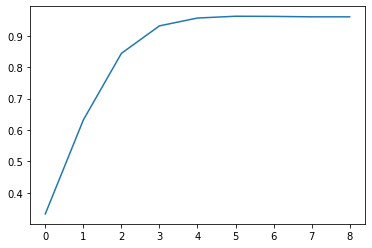

In [15]:
plt.plot(np.flip(resTree))
print(resTree)

In [23]:
date=dt.datetime.now().strftime("%Y_%m_%d-%H:%M:%S")
filename='DecisionTree.npy'
np.save(filename, np.flip(resTree))

In [16]:
resTree = np.load('saves/DecisionTree.npy', allow_pickle=True)

[0.32439487 0.61722829 0.8540579  0.9271476  0.9492169  0.95657333
 0.95823446 0.96203132 0.96416706]


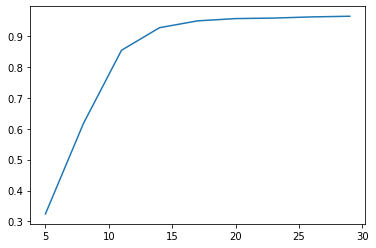

In [19]:
plt.plot(range(5,30,3),resTree)
print(resTree)

In [16]:
mat_confusion=metrics.confusion_matrix(ytest,ypredit)
print(mat_confusion.shape)
print(mat_confusion)

(33, 33)
[[134   0   0 ...   0   0   0]
 [  0 114   0 ...   0   0   0]
 [  0   0 136 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   2]
 [  0   0   0 ...   0 186   0]
 [  0   0   2 ...   0   0 110]]


In [17]:
np.save('saves/mat_DecisionTree.npy',mat_confusion)

<AxesSubplot:>

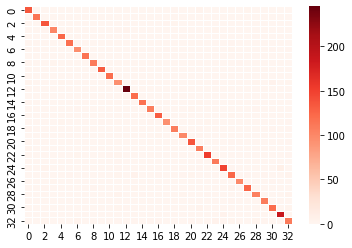

In [18]:
sea.heatmap(mat_confusion,linewidths=True,cmap='Reds')

In [11]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(Xtrain, ytrain)
predicted = GNB_classifier.predict(Xtest)
accuracy_score(ytest,predicted)


In [16]:
from sklearn.neural_network import MLPClassifier

In [24]:
classifier=MLPClassifier(hidden_layer_sizes=(150,150,50),solver="lbfgs")
classifier.fit(Xtrain, ytrain)
ypredit=classifier.predict(Xtest)
accuracy_score(ytest,ypredit)


C:\Users\thoma\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8566682486948267

In [25]:
mat_confusion=metrics.confusion_matrix(ytest,ypredit)

<AxesSubplot:>

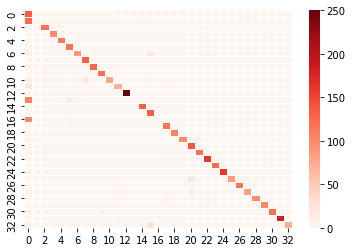

In [26]:
sea.heatmap(mat_confusion,linewidths=True,cmap='Reds')

[Text(0, 0.5, 'Apple Braeburn'),
 Text(0, 1.5, 'Apple Granny Smith'),
 Text(0, 2.5, 'Apricot'),
 Text(0, 3.5, 'Avocado'),
 Text(0, 4.5, 'Banana'),
 Text(0, 5.5, 'Blueberry'),
 Text(0, 6.5, 'Cactus fruit'),
 Text(0, 7.5, 'Cantaloupe'),
 Text(0, 8.5, 'Cherry'),
 Text(0, 9.5, 'Clementine'),
 Text(0, 10.5, 'Corn'),
 Text(0, 11.5, 'Cucumber Ripe'),
 Text(0, 12.5, 'Grape Blue'),
 Text(0, 13.5, 'Kiwi'),
 Text(0, 14.5, 'Lemon'),
 Text(0, 15.5, 'Limes'),
 Text(0, 16.5, 'Mango'),
 Text(0, 17.5, 'Onion White'),
 Text(0, 18.5, 'Orange'),
 Text(0, 19.5, 'Papaya'),
 Text(0, 20.5, 'Passion Fruit'),
 Text(0, 21.5, 'Peach'),
 Text(0, 22.5, 'Pear'),
 Text(0, 23.5, 'Pepper Green'),
 Text(0, 24.5, 'Pepper Red'),
 Text(0, 25.5, 'Pineapple'),
 Text(0, 26.5, 'Plum'),
 Text(0, 27.5, 'Pomegranate'),
 Text(0, 28.5, 'Potato Red'),
 Text(0, 29.5, 'Raspberry'),
 Text(0, 30.5, 'Strawberry'),
 Text(0, 31.5, 'Tomato'),
 Text(0, 32.5, 'Watermelon')]

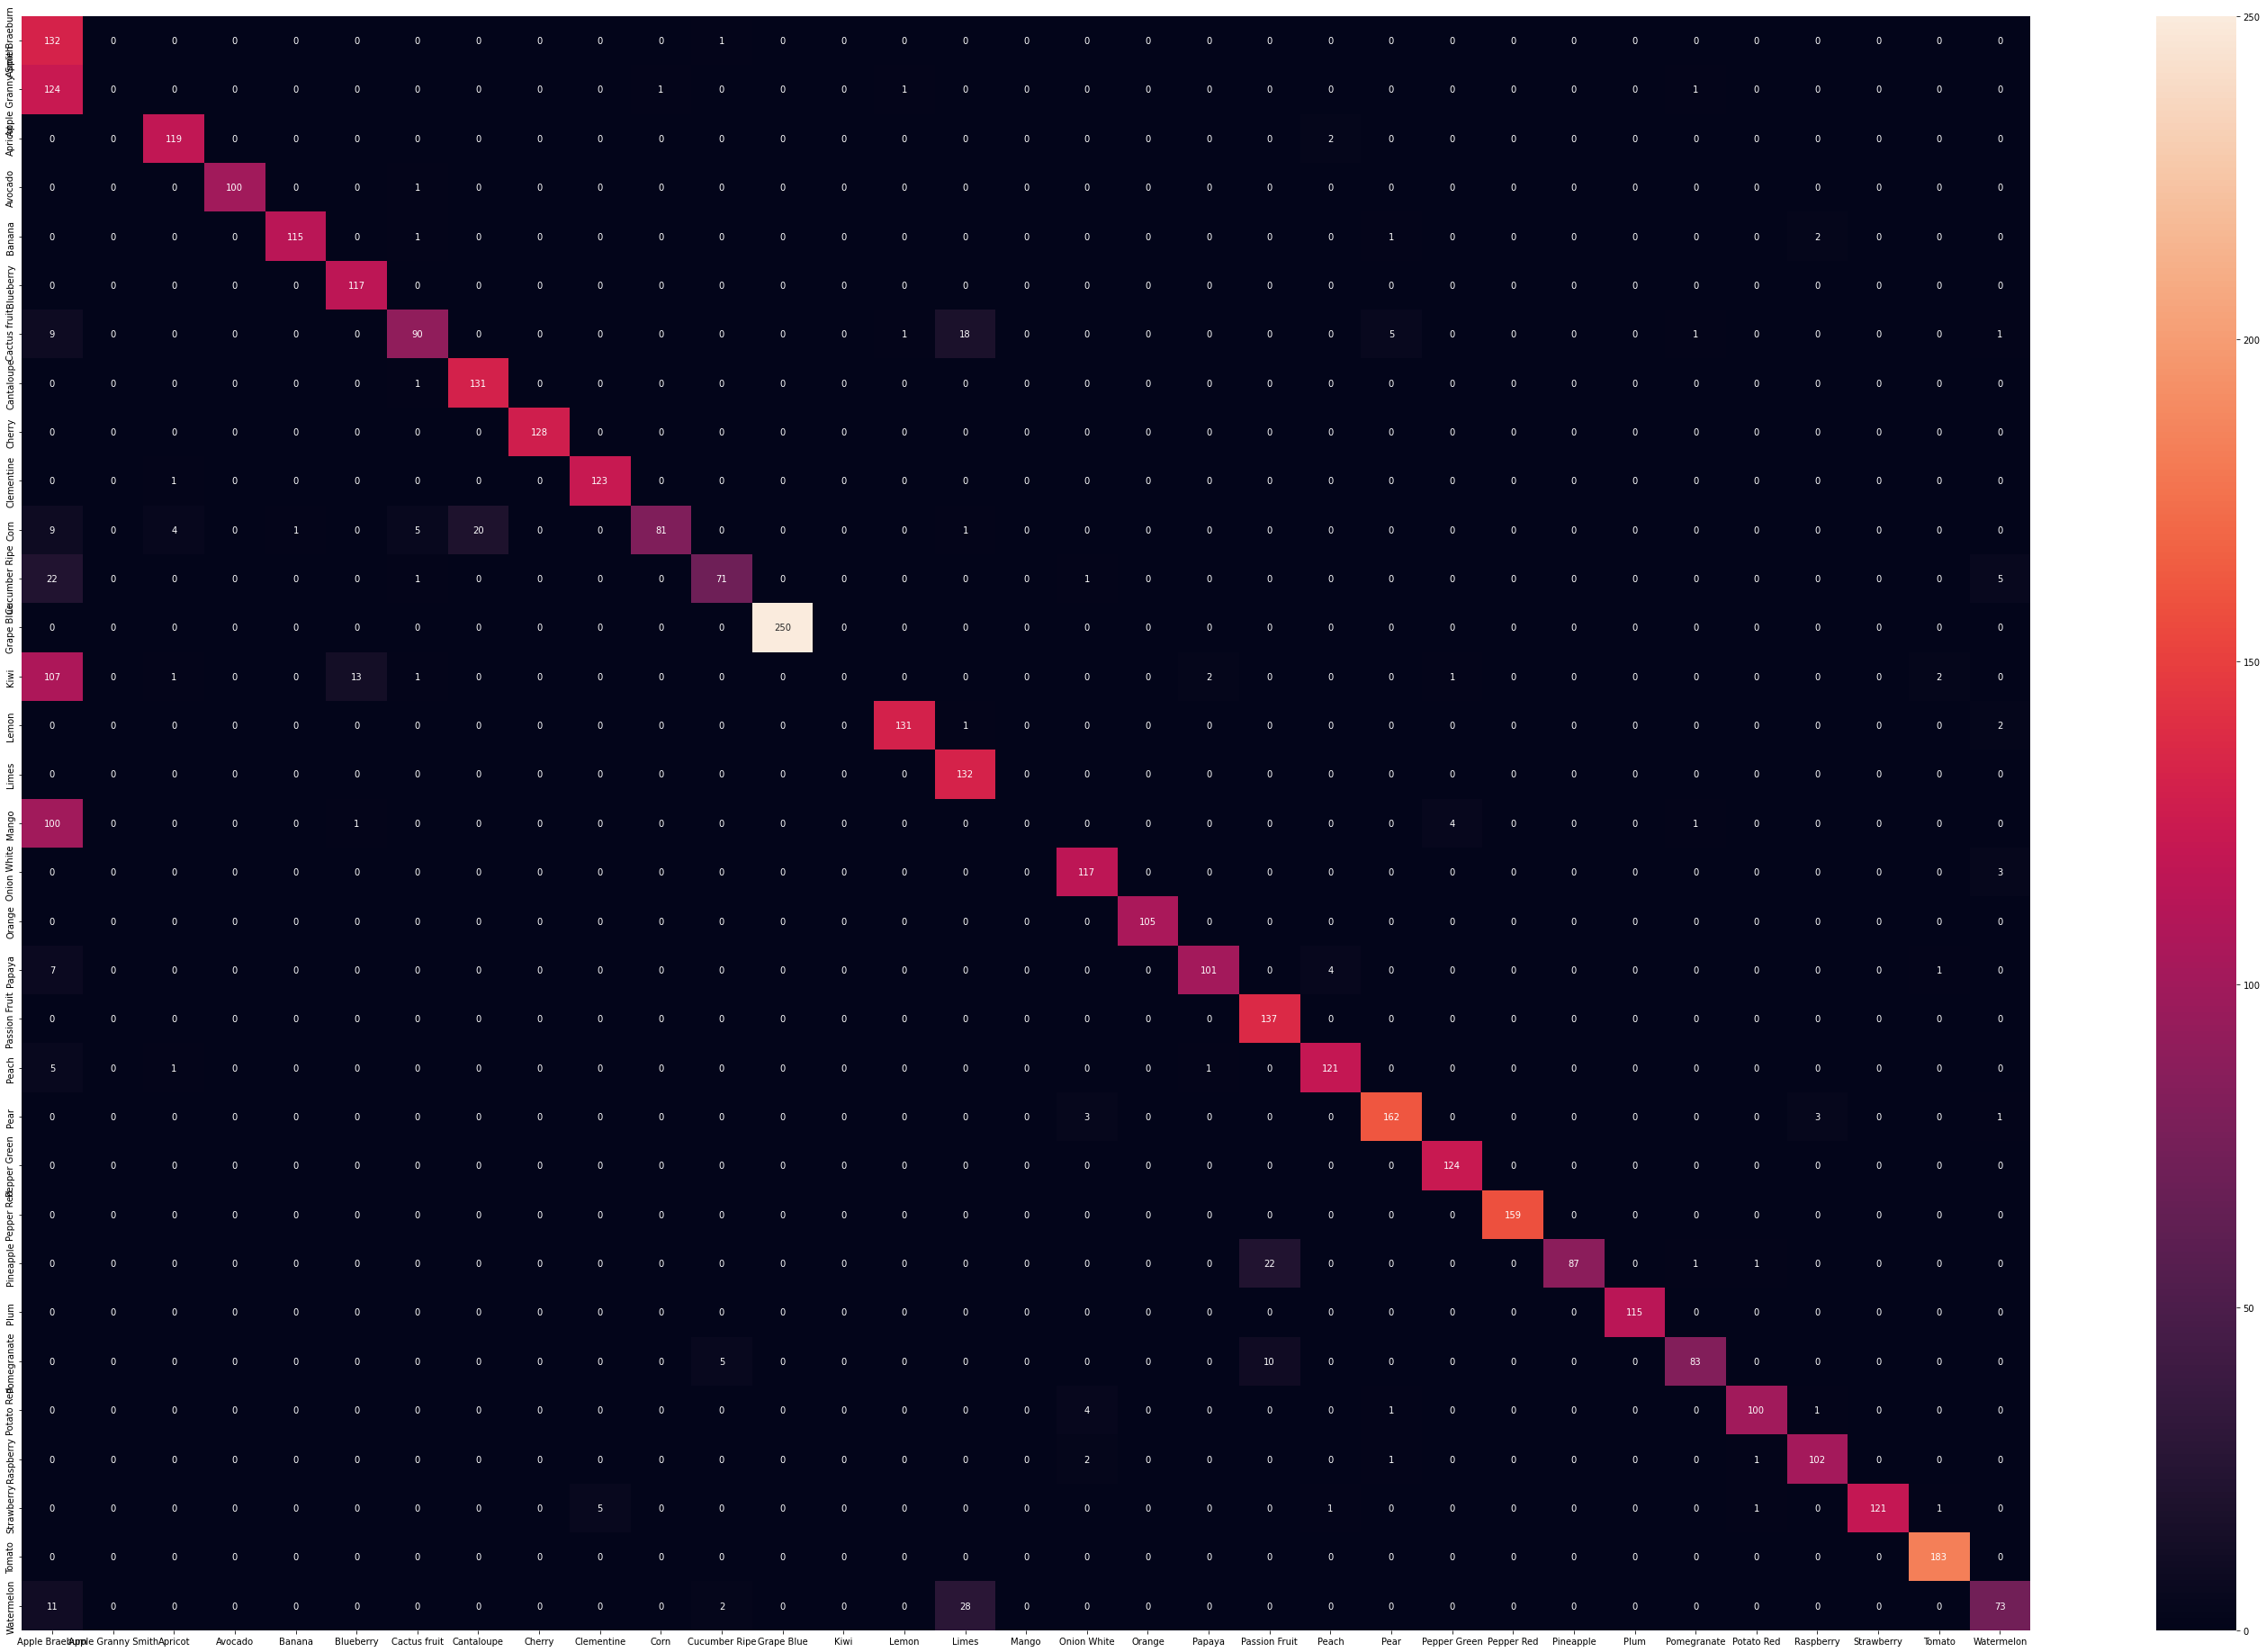

In [31]:
categories = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
f,ax=plt.subplots(figsize=(50,33))
sea.heatmap(mat_confusion,annot=True,fmt=".0f")
ax.set_xticklabels(categories)
ax.set_yticklabels(categories)
